# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Jasleen | Badhesha | Jasleen Badhesha November 29, 2024| 6 | 25% |
| Member 2: | Negar | Raika | Negar November 29, 2024| 6 | 25% |
| Member 3: | Deep | Patel | Deep November 29, 2024| 6 | 25% |
| Member 4: | Ishpreet | Kapoor | Ishpreet Kapoor November 29, 2024 | 6 | 25% |


---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [ ]:
# some library imports
import pandas as pd

First load the following datasets into dataframes.
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning.
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset.
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [ ]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe

#mounting google drive so we can access the data files
from google.colab import drive
drive.mount('/content/drive')

# uncomment and compelete below
cv_set = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment4/UrbanNav-HK_Whampoa-20210521_sensors.csv')

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
test_set1 = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment4/UrbanNav-HK_TST-20210517_sensors.csv')

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
test_set2 = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment4/2020-03-14-16-45-35.csv')

Mounted at /content/drive


For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples).

In [ ]:
# TODO: Display first two rows of cv_set
# (1 mark)
cv_set.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max,motion_state
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187,rest
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144,rest


In [ ]:
# TODO: Load the info method of cv_set
# (1 mark)
cv_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_min        1534 non-null 

In [ ]:
# TODO: Display the number of rows and columns  of all three datasets
# (1 mark)
#  .shape[0] returns rows and [1] returns column numbers
print(f"'cv_set' has {cv_set.shape[0]} rows and {cv_set.shape[1]} columns")
print(f"'test_set1' has {test_set1.shape[0]} rows and {test_set1.shape[1]} columns")
print(f"'test_set2' has {test_set2.shape[0]} rows and {test_set2.shape[1]} columns")

'cv_set' has 1534 rows and 33 columns
'test_set1' has 783 rows and 33 columns
'test_set2' has 297 rows and 33 columns


In [ ]:
# TODO: Display all columns in cv_set
# (1 mark)
print(cv_set.columns)

Index(['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum',
       'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var',
       'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min',
       'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max',
       'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state'],
      dtype='object')


In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features.

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y*

In [ ]:
# TODO - Load target vector into y
# (1 mark)
y = cv_set['motion_state']

#print(y) to make sure that was done properly

From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [ ]:
# TODO - Load all features from cv_set to X
# (2 marks)
X = cv_set.drop(columns=['motion_state'])
X.head(2)

___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [ ]:
# TODO - Perform test/train split
# (1 mark)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively.

In [ ]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
pipe = Pipeline([
     ('scaler', StandardScaler()),
     ('classifier', SVC(kernel = 'rbf'))
])

Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options.

In [ ]:
# TODO - Setup grid set
# (4 marks)

param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None], #these are the options for scalerr
    'classifier__C': [0.01, 0.1, 1 ,10, 100], #this tunes parameter C
    'classifier__gamma': [0.001, 0.01, 0.1, 1], #this tunes the parameters for gamma
}

In [ ]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search
# (2 marks)

#calculating the best cross-validation training score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

training_scores = cross_val_score(grid, X_train, y_train, cv=KFold(n_splits=2, shuffle=True, random_state=42)) #n_splits=2 because more than this took too long to load
best_training_score = max(training_scores)

#calculating the best cross-validation test score
test_scores = cross_val_score(grid, X_test, y_test, cv=KFold(n_splits=2, shuffle=True, random_state=42))
best_test_score = max(test_scores)

#calculating the test-set accuracy score and then printing it
from sklearn.metrics import accuracy_score
y_test_pred = grid.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

#printing the best parameters, best test and training cross-validation scores, and the test-set scores
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(best_training_score))
print("Best cross-validation test score: {:.2f}".format(best_test_score))
print("Test-set score: {:.2f}".format(test_accuracy))

Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.

In [ ]:
# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)
#import the necessary packages
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

#Creating the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)

#Below code prints confusion matrix using a heatmap
#print(grid.classes_) #print this to figure out what the labels should be

sns.heatmap(conf_mat, xticklabels=['Rest', 'Straight', 'Turn'],  yticklabels= ['Rest', 'Straight', 'Turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.show()

#Creating the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers

1.
The model fits the dataset well, capturing the patterns in the data effectively.  F1 score combine precision and recall scores, which are all high indicating that the model has learned the patterns in the data well and generalizes effectively to unseen samples.
There is a slight tendency to confuse “Straight” samples with “Rest,” which could indicate overlap in feature characteristics between these classes.


2.
- In the grid search, we used [0.01, 0.1, 1, 10, 100] for C. C controls the trade-off between maximizing and minimizing the classification error. A higher C value may lead to overfitting in the data because it wants to fit the training dataset as closely as possible, whereas a lower C may lead to underfitting.

- We used [0.001, 0.01, 0.1, 1] for gamma. Gamma controls how far the influence of a single training example reaches. A larger value means there is a narrow boundary of influence, and can lead to overfits and a low gamma means there is a broader scope of influence, which can lead to underfits.

- We believe that the intervals we set for grid search for both C and gamma are suitable because it covers a large range of values (small, moderate, and large values). Our f1 scores were consistently high (0.96) which indicates that our model is effectively finding the solution with the given conditions.


___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 marks)
y1 =test_set1['motion_state']
X1 = test_set1.drop(columns=['motion_state'])
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop(columns=['motion_state'])
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


____

#### 1.3.2 - Visualize Results

In [ ]:
#building the model for test_set1
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42, stratify=y1)
grid1 = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid1.fit(X1_train, y1_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

In [ ]:
#building the model for test_set2
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42, stratify=y2)
grid2 = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid2.fit(X2_train, y2_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 marks)
#accuracies for test_set1
y1_test_pred = grid1.best_estimator_.predict(X1_test)
test_accuracy1 = accuracy_score(y1_test, y1_test_pred)
print("test_set1 score: {:.2f}".format(test_accuracy1))

#accuracies for test_set2
y2_test_pred = grid2.best_estimator_.predict(X2_test)
test_accuracy2 = accuracy_score(y2_test, y2_test_pred)
print("test_set2 score: {:.2f}".format(test_accuracy2))

test_set1 score: 0.94
test_set2 score: 0.94


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

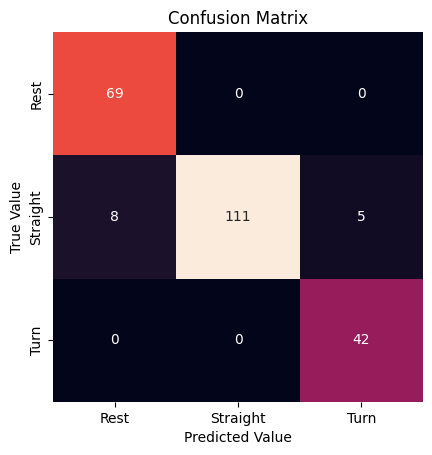


Classification Report:
              precision    recall  f1-score   support

        rest       0.90      1.00      0.95        69
    straight       1.00      0.90      0.94       124
        turn       0.89      1.00      0.94        42

    accuracy                           0.94       235
   macro avg       0.93      0.97      0.94       235
weighted avg       0.95      0.94      0.94       235



In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 marks)

#Creating the confusion matrix
conf_mat1 = confusion_matrix(y1_test, y1_test_pred)

#Below code prints confusion matrix using a heatmap
sns.heatmap(conf_mat1, xticklabels=['Rest', 'Straight', 'Turn'],  yticklabels= ['Rest', 'Straight', 'Turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.show()

#Creating the classification report
print("\nClassification Report:")
print(classification_report(y1_test, y1_test_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

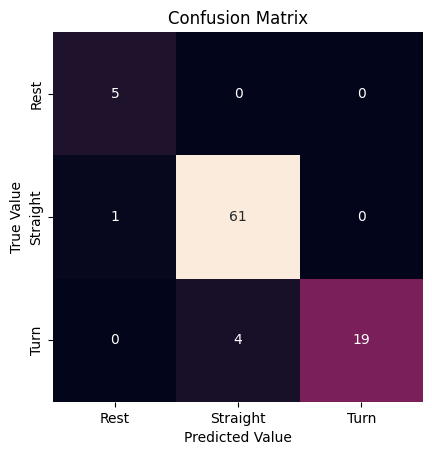


Classification Report:
              precision    recall  f1-score   support

        rest       0.83      1.00      0.91         5
    straight       0.94      0.98      0.96        62
        turn       1.00      0.83      0.90        23

    accuracy                           0.94        90
   macro avg       0.92      0.94      0.92        90
weighted avg       0.95      0.94      0.94        90



In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
#Creating the confusion matrix
conf_mat2 = confusion_matrix(y2_test, y2_test_pred)

#Below code prints confusion matrix using a heatmap
sns.heatmap(conf_mat2, xticklabels=['Rest', 'Straight', 'Turn'],  yticklabels= ['Rest', 'Straight', 'Turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.show()

#Creating the classification report
print("\nClassification Report:")
print(classification_report(y2_test, y2_test_pred))

___

#### 1.3.3 - Questions

**Based on results so far**
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers
1. The performance with each one ((X_test, y_test), (X1, y1), (X2, y2)) respectively decreases as the size of the datasets decrease. Smaller datasets provide less information for the model to learn and generalize patterns effectively. As dataset size decreases, the accuracy decreased from 96% to 94%, and the variance in performance increases, leading to potential drops in precision, recall, and F1-scores for specific classes.
2. Potential causes for this behaviour in performance is insufficient data limits the model’s ability to learn robust patterns and generalize effectively. Class imbalance is more pronounced in smaller datasets, which reduces recall and F1-scores for underrepresented classes. Smaller datasets lack the diversity required to represent the variety of patterns in the data, and the noise have a greater impact due to the reduced sample size.

___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [ ]:
# TODO - Load selected features from cv_set to X
# (1 marks
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
X = cv_set[selected_features]
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [ ]:
# TODO - Load motion_state column (target vector) into y
target_column = 'motion_state'
y = cv_set[target_column]

___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`
#perform the test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#initialize the pipleline
pipe = Pipeline([
     ('scaler', StandardScaler()),
     ('classifier', SVC(kernel = 'rbf'))
])

#setup grid set
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None], #these are the options for scalerr
    'classifier__C': [0.01, 0.1, 1 ,10, 100], #this tunes parameter C
    'classifier__gamma': [0.001, 0.01, 0.1, 1], #this tunes the parameters for gamma
}

#perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

#calculating the best cross validation test scores
training_scores = cross_val_score(grid, X_train, y_train, cv=KFold(n_splits=2, shuffle=True, random_state=42)) #n_splits=2 because more than this took too long to load
best_training_score = max(training_scores)

#calculating the best cross-validation test score
test_scores = cross_val_score(grid, X_test, y_test, cv=KFold(n_splits=2, shuffle=True, random_state=42))
best_test_score = max(test_scores)

#calculating the test-set accuracy score and then printing it
from sklearn.metrics import accuracy_score
y_test_pred = grid.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)


#printing the best parameters, best test and training cross-validation scores, and the test-set scores
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(best_training_score))
print("Best cross-validation test score: {:.2f}".format(best_test_score))
print("Test-set score: {:.2f}".format(test_accuracy))


Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'scaler': RobustScaler()}

Best cross-validation train score: 0.81
Best cross-validation test score: 0.78
Test-set score: 0.83


Display the confusion matrix and print the classification report for the trained model using the *test* split.

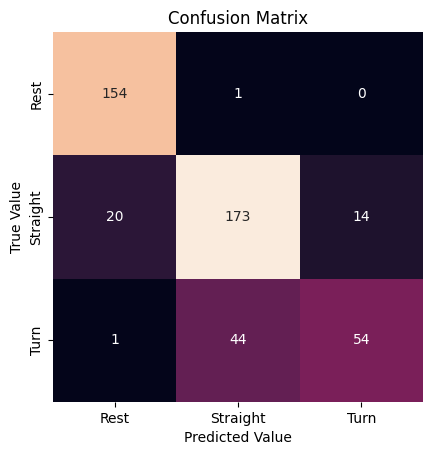


Classification Report:
              precision    recall  f1-score   support

        rest       0.88      0.99      0.93       155
    straight       0.79      0.84      0.81       207
        turn       0.79      0.55      0.65        99

    accuracy                           0.83       461
   macro avg       0.82      0.79      0.80       461
weighted avg       0.82      0.83      0.82       461



In [ ]:
# TODO - Display confusion matrix and print classification reports
#Creating the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)

#Below code prints confusion matrix using a heatmap

sns.heatmap(conf_mat, xticklabels=['Rest', 'Straight', 'Turn'],  yticklabels= ['Rest', 'Straight', 'Turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.show()

#Creating the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer
1. Section 1 uses all features, leading to a higher complexity model that performs well overall (96% test accuracy). Section 2 uses a smaller feature set, reducing complexity and results in slightly lower performance (83% test accuracy). The simpler model is more interpretable but may underfit slightly.

Based on cross-validation and test accuracy, the Section 1 model fits the data better. The model predicts rest very well due to better representation and more distinct features in the dataset, however the model struggled to predict turning as there were not enough features used to identify when turning.

___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 marks)
target_column = 'motion_state'
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
y1 = test_set1[target_column]
X1 = test_set1[selected_features]
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2[target_column]
X2 = test_set2[selected_features]
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#accuracies for test_set1
y1_test_pred = grid1.best_estimator_.predict(X1_test)
test_accuracy1 = accuracy_score(y1_test, y1_test_pred)
print("test_set1 score: {:.2f}".format(test_accuracy1))

#accuracies for test_set2
y2_test_pred = grid2.best_estimator_.predict(X2_test)
test_accuracy2 = accuracy_score(y2_test, y2_test_pred)
print("test_set2 score: {:.2f}".format(test_accuracy2))

test_set1 score: 0.94
test_set2 score: 0.94


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

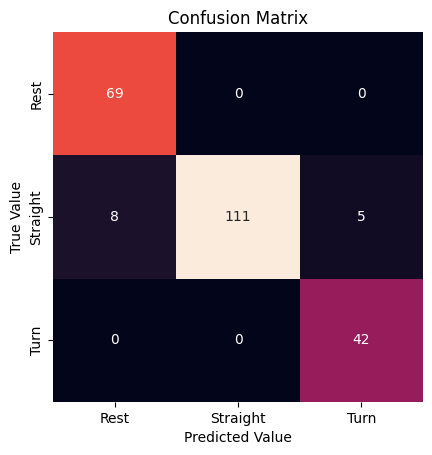


Classification Report:
              precision    recall  f1-score   support

        rest       0.90      1.00      0.95        69
    straight       1.00      0.90      0.94       124
        turn       0.89      1.00      0.94        42

    accuracy                           0.94       235
   macro avg       0.93      0.97      0.94       235
weighted avg       0.95      0.94      0.94       235



In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

#Creating the confusion matrix
conf_mat1 = confusion_matrix(y1_test, y1_test_pred)

#Below code prints confusion matrix using a heatmap
sns.heatmap(conf_mat1, xticklabels=['Rest', 'Straight', 'Turn'],  yticklabels= ['Rest', 'Straight', 'Turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.show()

#Creating the classification report
print("\nClassification Report:")
print(classification_report(y1_test, y1_test_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

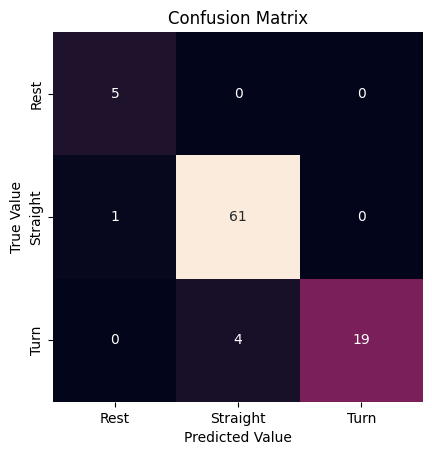


Classification Report:
              precision    recall  f1-score   support

        rest       0.83      1.00      0.91         5
    straight       0.94      0.98      0.96        62
        turn       1.00      0.83      0.90        23

    accuracy                           0.94        90
   macro avg       0.92      0.94      0.92        90
weighted avg       0.95      0.94      0.94        90



In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

#Creating the confusion matrix
conf_mat2 = confusion_matrix(y2_test, y2_test_pred)

#Below code prints confusion matrix using a heatmap
sns.heatmap(conf_mat2, xticklabels=['Rest', 'Straight', 'Turn'],  yticklabels= ['Rest', 'Straight', 'Turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.show()

#Creating the classification report
print("\nClassification Report:")
print(classification_report(y2_test, y2_test_pred))

___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
1.
In Section 2, the model trained on the training/validation dataset (2.1) achieved an accuracy of 83%, while the two independent testing sets (2.2) performed with 91% accuracy for Test Set 1 and 90% accuracy for Test Set 2.
The model generalizes well to the unseen test datasets, as it achieves higher accuracy on the test sets compared to the training/validation dataset. This suggests that the model is not overfitting, as it maintains strong performance with new data. However, the performance still varies slightly between datasets, potentially due to differences in feature distributions in the test sets. The model struggles most with predicting turn as is showed lower recall and F1-scores for this class across all datasets.

2. The Section 1 model fits the training/validation dataset better, achieving higher accuracy, but may risk overfitting due to high complexity. It performs slightly worse on test sets compared to Section 2, likely due to redundant features.
The Section 2 model, generalizes better on unseen datasets even though it is less accurate on training/validation data. It achieves high accuracy on test sets but underperforms in classifying the Turn class as there were not enough features used to identify when turning.



____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

# Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)


**Answer**
1.   The features that we want to select are as follows:
- a_sum, a_var: we want to use these because it helps us capture the overall accelaration and the variability in acceleration. This will help determine when the car is moving or at rest
- g_sum, g_var: we want to use these because it will help determine when the car is turning
- ax_var, gy_var: we want to use these because they help distinguish when a car may be moving slowly or idling
- a_min, a_max, gz_min, gz_max: we want to use these to help determine when abrubt changes to motion are made, such as a car slamming the brakes or suddenly turning

In [ ]:
# TODO - Load group selected features from cv_set to X
# X =
selected_features = ['a_sum', 'a_var', 'g_sum', 'g_var', 'ax_var', 'gy_var', 'a_min', 'a_max', 'gz_min','gz_max']
X = cv_set[selected_features]
X.head(2)

,a_sum,a_var,g_sum,g_var,ax_var,gy_var,a_min,a_max,gz_min,gz_max
0,9.797418,3.334598e-08,0.022554,6.879234e-10,8.046094e-07,6.964705e-10,0.023871,0.024997,-0.000082,0.000078
1,9.798815,1.588712e-08,0.021731,6.794409e-10,1.032619e-06,6.533136e-10,0.024153,0.024829,-0.000090,0.000090


In [ ]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']
print(y.head(10))

0        rest
1        rest
2    straight
3        turn
4        turn
5        turn
6        turn
7        turn
8        turn
9        turn
Name: motion_state, dtype: object


___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`

#perform test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#initialize the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling step
    ('classifier', SVC())          # Support Vector Classifier step
])

# Define the parameter grid to search over for hyperparameter tuning
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None], #these are the options for scaler
    'classifier__C': [0.01, 0.1, 1 ,10, 100], #this tunes parameter C
    'classifier__gamma': [0.001, 0.01, 0.1, 1], #this tunes the parameters for gamma
}

# Initialize GridSearchCV with 5-fold cross-validation
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Fit the grid search model on the data
grid.fit(X, y)

___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

#calculate the best training cross-validation score
training_scores = cross_val_score(grid, X_train, y_train, cv=KFold(n_splits=2, shuffle=True, random_state=42)) #n_splits=2 because more than this took too long to load
best_training_score = max(training_scores)

#calculating the best cross-validation test score
test_scores = cross_val_score(grid, X_test, y_test, cv=KFold(n_splits=2, shuffle=True, random_state=42))
best_test_score = max(test_scores)

#calculating the test-set accuracy score and then printing it
from sklearn.metrics import accuracy_score
y_test_pred = grid.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

#printing the best parameters, best test and training cross-validation scores, and the test-set scores
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(best_training_score))
print("Best cross-validation test score: {:.2f}".format(best_test_score))
print("Test-set score: {:.2f}".format(test_accuracy))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'scaler': RobustScaler()}

Best cross-validation train score: 0.94
Best cross-validation test score: 0.92
Test-set score: 0.97


Display the confusion matrix and print the classification report for the trained model using the *test* split.

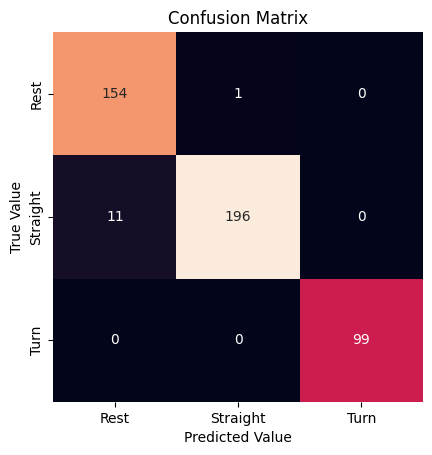


Classification Report:
              precision    recall  f1-score   support

        rest       0.93      0.99      0.96       155
    straight       0.99      0.95      0.97       207
        turn       1.00      1.00      1.00        99

    accuracy                           0.97       461
   macro avg       0.98      0.98      0.98       461
weighted avg       0.98      0.97      0.97       461



In [ ]:
# TODO - Display confusion matrix and print classification report
y_test_pred = grid.best_estimator_.predict(X_test)

#Creating the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)

#Below code prints confusion matrix using a heatmap

sns.heatmap(conf_mat, xticklabels=['Rest', 'Straight', 'Turn'],  yticklabels= ['Rest', 'Straight', 'Turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.show()

#Creating the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1[selected_features]
X1.head(2)

,a_sum,a_var,g_sum,g_var,ax_var,gy_var,a_min,a_max,gz_min,gz_max
0,9.801661,3.437614e-08,0.025634,1.003403e-09,0.000001,6.507877e-10,0.024056,0.024886,-0.000102,0.000069
1,9.802481,3.613404e-08,0.025218,9.791644e-10,0.000001,6.788807e-10,0.024084,0.024883,-0.000094,0.000076


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[selected_features]
X2.head(2)

,a_sum,a_var,g_sum,g_var,ax_var,gy_var,a_min,a_max,gz_min,gz_max
0,9.800683,6.614559e-08,0.012437,7.031396e-10,0.000002,1.211633e-09,0.048406,0.049764,-0.000122,0.000080
1,9.797741,3.344639e-07,0.013805,9.305619e-10,0.000003,1.893673e-09,0.047696,0.050763,-0.000098,0.000083


___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2

#accuracies for test_set1
y1_test_pred = grid1.best_estimator_.predict(X1_test)
test_accuracy1 = accuracy_score(y1_test, y1_test_pred)
print("test_set1 score: {:.2f}".format(test_accuracy1))

#accuracies for test_set2
y2_test_pred = grid2.best_estimator_.predict(X2_test)
test_accuracy2 = accuracy_score(y2_test, y2_test_pred)
print("test_set2 score: {:.2f}".format(test_accuracy2))

test_set1 score: 0.94
test_set2 score: 0.94


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

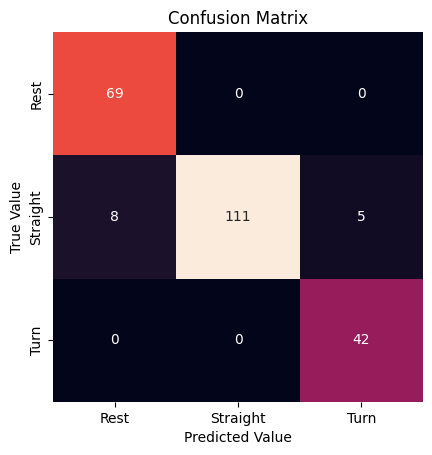


Classification Report:
              precision    recall  f1-score   support

        rest       0.90      1.00      0.95        69
    straight       1.00      0.90      0.94       124
        turn       0.89      1.00      0.94        42

    accuracy                           0.94       235
   macro avg       0.93      0.97      0.94       235
weighted avg       0.95      0.94      0.94       235



In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y1_pred = grid.best_estimator_.predict(X1)

#Creating the confusion matrix
conf_mat1 = confusion_matrix(y1_test, y1_test_pred)

#Below code prints confusion matrix using a heatmap
sns.heatmap(conf_mat1, xticklabels=['Rest', 'Straight', 'Turn'],  yticklabels= ['Rest', 'Straight', 'Turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.show()

#Creating the classification report
print("\nClassification Report:")
print(classification_report(y1_test, y1_test_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

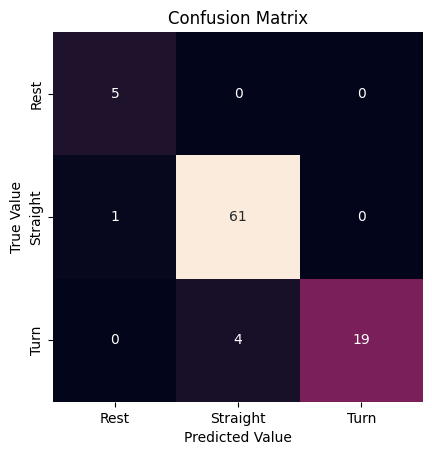


Classification Report:
              precision    recall  f1-score   support

        rest       0.83      1.00      0.91         5
    straight       0.94      0.98      0.96        62
        turn       1.00      0.83      0.90        23

    accuracy                           0.94        90
   macro avg       0.92      0.94      0.92        90
weighted avg       0.95      0.94      0.94        90



In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

#Creating the confusion matrix
conf_mat2 = confusion_matrix(y2_test, y2_test_pred)

#Below code prints confusion matrix using a heatmap
sns.heatmap(conf_mat2, xticklabels=['Rest', 'Straight', 'Turn'],  yticklabels= ['Rest', 'Straight', 'Turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.show()

#Creating the classification report
print("\nClassification Report:")
print(classification_report(y2_test, y2_test_pred))

___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*.

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers
1.
The model in Section 3, group-selected features, shows improved generalization compared to the model in Section 1, when tested on the independent datasets. While the Section 1 model achieves high accuracy on its training dataset because it has access to all of the features, this comprehensive feature set increases the likelihood of overfitting, leading to reduced performance on unseen data. Section 3 model demonstrates better performance on test datasets by focusing on a concise, relevant feature set, resulting in better generalization.

The model in Section 3 outperforms the Section 2 model that uses a smaller subset of selected features. Section 3 uses well chosen group-selected features and allows it to capture subtle variations in motion states more effectively than the smaller feature set in Section 2. This results in higher accuracy and classification metrics, particularly in distinguishing complex states such as turning.


2.
1. Feature Representation:
The model in Section 1 utilizes all features, including those with potentially redundant or irrelevant information, leading to overfitting on the training set and reduced generalization to test datasets.
Section 2 focuses on selected features, which eliminates noise and irrelevant data, but might lose some valuable information, leading to slightly lower performance compared to Section 1.
Section 3 uses group-selected features that are specifically tailored to the motion states, improving the model’s ability to generalize across datasets.
2. Overfitting and Generalization:
Section 1’s model, using all features, has a higher risk of overfitting, as it attempts to learn patterns from features that may not generalize to new data.
Section 2 and Section 3 mitigate overfitting by reducing the feature set. However, Section 3 achieves the best balance by retaining only the most critical features for classification, enabling the model to generalize better on test datasets.
3. Model Complexity and Interpretability:
The model in Section 1 is more complex, making it harder to interpret and more sensitive to noise in the data. The models in Sections 2 and 3 are simpler, reducing the risk of overfitting while retaining sufficient predictive power. Section 3 achieves the best trade-off between interpretability and performance by selecting features that are directly relevant to the task.

____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [ ]:
# TODO - Load all features from cv_set to X
X = cv_set.drop(columns=['motion_state'])
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


In [ ]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']
y.head()

,motion_state
0,rest
1,rest
2,straight
3,turn
4,turn


___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [ ]:
# TODO - Perform test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In the `Pipeline` add an entry *'pca'* to apply `PCA`.



In [ ]:
# Perform any missing imports
from sklearn.decomposition import PCA
# TODO - Initiate the pipeline
# (1 marks)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', SVC())
])

Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [ ]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],  # Options for data scaling
    'classifier__C': [0.01, 0.1, 1, 10, 100],           # Regularization parameter
    'classifier__gamma': [0.001, 0.01, 0.1, 1] ,# Kernel coefficient
    'pca__n_components': [4, 7, 11, 14, 16]   #testing the different number of PCA components
}

In [ ]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'pca__n_components': [4, 7, 11, 14, 16],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

#calculating the best cross-validation training score
training_scores = cross_val_score(grid, X_train, y_train, cv=KFold(n_splits=2, shuffle=True, random_state=42)) #n_splits=2 because more than this took too long to load
best_training_score = max(training_scores)

#calculating the best cross-validation test score
test_scores = cross_val_score(grid, X_test, y_test, cv=KFold(n_splits=2, shuffle=True, random_state=42))
best_test_score = max(test_scores)

#calculating the test-set accuracy score and then printing it
from sklearn.metrics import accuracy_score
y_test_pred = grid.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

#printing the best parameters, best test and training cross-validation scores, and the test-set scores
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(best_training_score))
print("Best cross-validation test score: {:.2f}".format(best_test_score))
print("Test-set score: {:.2f}".format(test_accuracy))

Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification report

#Creating the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)

#Below code prints confusion matrix using a heatmap
#print(grid.classes_) #print this to figure out what the labels should be

sns.heatmap(conf_mat, xticklabels=['Rest', 'Straight', 'Turn'],  yticklabels= ['Rest', 'Straight', 'Turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.show()

#Creating the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
y1 =test_set1['motion_state']
X1 = test_set1.drop(columns=['motion_state'])
X1.head(2)

In [ ]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop(columns=['motion_state'])
X2.head(2)

___

#### 4.2.2 - Visualize Results

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#accuracies for test_set1
y1_test_pred = grid1.best_estimator_.predict(X1_test)
test_accuracy1 = accuracy_score(y1_test, y1_test_pred)
print("test_set1 score: {:.2f}".format(test_accuracy1))

#accuracies for test_set2
y2_test_pred = grid2.best_estimator_.predict(X2_test)
test_accuracy2 = accuracy_score(y2_test, y2_test_pred)
print("test_set2 score: {:.2f}".format(test_accuracy2))

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
#Creating the confusion matrix
conf_mat1 = confusion_matrix(y1_test, y1_test_pred)

#Below code prints confusion matrix using a heatmap
sns.heatmap(conf_mat1, xticklabels=['Rest', 'Straight', 'Turn'],  yticklabels= ['Rest', 'Straight', 'Turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.show()

#Creating the classification report
print("\nClassification Report:")
print(classification_report(y1_test, y1_test_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
#Creating the confusion matrix
conf_mat2 = confusion_matrix(y2_test, y2_test_pred)

#Below code prints confusion matrix using a heatmap
sns.heatmap(conf_mat2, xticklabels=['Rest', 'Straight', 'Turn'],  yticklabels= ['Rest', 'Straight', 'Turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.show()

#Creating the classification report
print("\nClassification Report:")
print(classification_report(y2_test, y2_test_pred))

___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*.
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers

1.
Section 1:
The model in Section 4 with PCA achieves slightly better performance compared to the model trained in Section 1 using all feature, as PCA eliminate irrelevant or redundant features, which helps reduce noise and improves generalization. Section 1 model uses all raw features, which may include irrelevant or noisy ones, potentially affecting its ability to generalize on unseen data. However, the PCA model transformed features are not easily interpretable, whereas the original features used in Section 1 are.

Section 2:
The Section 4 PCA model performs better than the Section 2 model that uses selected features. PCA identifies and retains the most significant components of the data based on variance, which capture more global patterns in the data compared to a manually selected subset of features. The selected features in Section 2 may omit some important information, leading to a decrease in performance when dealing with more complex or unseen datasets.

Section 3:
The PCA model outperforms the Section 3 model trained on group selected features. Group selection focuses on specific feature subsets, which might not capture the full variability of the data. PCA ensures that the components with the highest variance is included, resulting in better performance on test datasets. Section 3 model offers better interpretability due to grouping, however it cannot match the PCA model’s ability to generalize across different datasets.


2.
In Section 4 PCA transforms the feature set into uncorrelated components, and minimize redundancy to focus on the variability in the data. Whereas in Section 1 all raw features are used, which may include irrelevant or noisy features, lowering the model’s performance. PCA reduces noise in the data, and leads to improved generalization on unseen datasets. Section 1 there is no noise filtering, which might slightly lower its predictive performance. PCA eliminating irrelevant features enhances classification accuracy, whereas the original dataset in Section 1 is crowded by redundant or less informative features.

____

## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)


**Answer**
1.
The model we selected is Random Forest Classifier.
Random Forest was chosen for its ability to handle the pre-selected features from Section 2 effectively. Features, such as the variances and sums of accelerometer and gyroscope readings, capture key patterns in the dataset. By building multiple decision trees and averaging their predictions, Random Forest reduces the risk of overfitting, performs well even with noisy data, and can handle complex data relationships. Its feature importance ranking ensures the model focuses on the most relevant features, making it particularly suited for classification tasks and achieving accurate predictions on both training and test datasets.

In [ ]:
# TODO - Load group selected features from cv_set to X
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
X = cv_set[selected_features]
X.head(2)

In [ ]:
# TODO - Load motion_state column (target vector) into y
target_column = 'motion_state'
y = cv_set[target_column]

___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [ ]:
# TODO - Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=42, stratify=y)

In [ ]:
# Perform any missing imports
from sklearn.ensemble import RandomForestClassifier

# TODO - Initiate the pipeline
# (1 mark)
pipe = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler as the first step
    ('classifier', RandomForestClassifier(random_state=42))  # RandomForest as the classifier
])

In [ ]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],  # Scaler options
    'classifier__n_estimators': [100, 200, 300],         # Number of trees in RandomForest
    'classifier__max_depth': [10, 20, 30, None],         # Maximum depth of trees
    'classifier__min_samples_split': [2, 5, 10],         # Minimum samples required to split a node
    'classifier__min_samples_leaf': [1, 2, 4]            # Minimum samples required at a leaf node
}

In [ ]:
# TODO - Perform the grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1)   #setting n_jobs to -1 to use all availible processors
grid.fit(X_train, y_train)

___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

# calculating the best cross-validation training score for our set
training_scores = cross_val_score(grid, X_train, y_train, cv=KFold(n_splits=2, shuffle=True, random_state=42)) #n_splits=2 because more than this took too long to load
best_training_score = max(training_scores)

#calculating the best cross-validation test score
test_scores = cross_val_score(grid, X_test, y_test, cv=KFold(n_splits=2, shuffle=True, random_state=42))
best_test_score = max(test_scores)

#calculating the test-set accuracy score and then printing it
from sklearn.metrics import accuracy_score
y_test_pred = grid.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

#printing the best parameters, best test and training cross-validation scores, and the test-set scores
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(best_training_score))
print("Best cross-validation test score: {:.2f}".format(best_test_score))
print("Test-set score: {:.2f}".format(test_accuracy))

Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification report
#Creating the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)

#Below code prints confusion matrix using a heatmap
sns.heatmap(conf_mat, xticklabels=['Rest', 'Straight', 'Turn'],  yticklabels= ['Rest', 'Straight', 'Turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.show()

#Creating the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
target_column = 'motion_state'
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
y1 = test_set1[target_column]
X1 = test_set1[selected_features]
X1.head(2)

In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2[target_column]
X2 = test_set2[selected_features]
X2.head(2)

___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#accuracies for test_set1
y1_test_pred = grid1.best_estimator_.predict(X1_test)
test_accuracy1 = accuracy_score(y1_test, y1_test_pred)
print("test_set1 score: {:.2f}".format(test_accuracy1))

#accuracies for test_set2
y2_test_pred = grid2.best_estimator_.predict(X2_test)
test_accuracy2 = accuracy_score(y2_test, y2_test_pred)
print("test_set2 score: {:.2f}".format(test_accuracy2))

Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [ ]:
#Creating the confusion matrix
conf_mat1 = confusion_matrix(y1_test, y1_test_pred)

#Below code prints confusion matrix using a heatmap
sns.heatmap(conf_mat1, xticklabels=['Rest', 'Straight', 'Turn'],  yticklabels= ['Rest', 'Straight', 'Turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.show()

#Creating the classification report
print("\nClassification Report:")
print(classification_report(y1_test, y1_test_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
#Creating the confusion matrix
conf_mat2 = confusion_matrix(y2_test, y2_test_pred)

#Below code prints confusion matrix using a heatmap
sns.heatmap(conf_mat2, xticklabels=['Rest', 'Straight', 'Turn'],  yticklabels= ['Rest', 'Straight', 'Turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.show()

#Creating the classification report
print("\nClassification Report:")
print(classification_report(y2_test, y2_test_pred))

___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

#### 5.2.3 - Answer
1. Section 5 is overall better based on F1-scores, but a little worse at figuring out when we are at rest but better at predicting when its going straight. There was slight better accuracy for section 5 as Random Forest has the ability to handle noise and nonlinear relationships effectively. The slight improvement may also result from the Random Forest averaging results across multiple decision trees, reducing the impact of overfitting compared to the SVC model.


____